### Question 1

1. Download pretrained pytorch MobilenetV1 SSD and test it locally using Pascal VOC 2007 dataset.
Show the test accuracy for the 20 classes.

I downloaed the data from this website:
http://host.robots.ox.ac.uk/pascal/VOC/voc2007/#testdata

In [1]:
%%bash
git clone https://github.com/qfgaohao/pytorch-ssd.git

Cloning into 'pytorch-ssd'...


In [ ]:
import tarfile
  
# open file
file = tarfile.open('data/VOCtest_06-Nov-2007.tar')

# extracting file
file.extractall('unzip/test')
  
file.close()

In [21]:
!wget -P models https://storage.googleapis.com/models-hao/mobilenet-v1-ssd-mp-0_675.pth
!wget -P models https://storage.googleapis.com/models-hao/voc-model-labels.txt
!wget -P models https://storage.googleapis.com/models-hao/mb2-imagenet-71_8.pth


--2022-12-03 18:41:24--  https://storage.googleapis.com/models-hao/mobilenet-v1-ssd-mp-0_675.pth
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37995286 (36M) [application/octet-stream]
Saving to: ‘models/mobilenet-v1-ssd-mp-0_675.pth’

mobilenet-v1-ssd-mp 100%[===================>]  36.23M   141MB/s    in 0.3s    

2022-12-03 18:41:24 (141 MB/s) - ‘models/mobilenet-v1-ssd-mp-0_675.pth’ saved [37995286/37995286]

--2022-12-03 18:41:24--  https://storage.googleapis.com/models-hao/voc-model-labels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [11]:
pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 845.0 kB/s eta 0:00:000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 19.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 78.4 MB/s eta 0:00:00:00:010:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 21.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
!python pytorch-ssd/run_ssd_live_demo.py mb1-ssd models/mobilenet-v1-ssd-mp-0_675.pth models/voc-model-labels.txt

[ WARN:0@0.027] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
^C
Traceback (most recent call last):
  File "pytorch-ssd/run_ssd_live_demo.py", line 65, in <module>
    ret, orig_image = cap.read()
KeyboardInterrupt


In [26]:
!python pytorch-ssd/eval_ssd.py --net mb1-ssd \
                                              --trained_model models/mobilenet-v1-ssd-mp-0_675.pth \
                                              --dataset_type voc \
                                              --dataset unzip/test/VOCdevkit/VOC2007 \
                                              --label_file models/voc-model-labels.txt

pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.05292844772338867 seconds to load the model.
process image 0
Load Image: 0.003652 seconds.
Inference time:  0.03775668144226074
Prediction: 0.054117 seconds.
process image 1
Load Image: 0.003128 seconds.
Inference time:  0.008128881454467773
Prediction: 0.050089 seconds.
process image 2
Load Image: 0.003521 seconds.
Inference time:  0.007147312164306641
Prediction: 0.051670 seconds.
process image 3
Load Image: 0.003592 seconds.
Inference time:  0.007678985595703125
Prediction: 0.050993 seconds.
process image 4
Load Image: 0.003167 seconds.
Inference time:  0.008585691452026367
Prediction: 0.035645 seconds.
process image 5
Load Image: 0.002950 seconds.
Inference time: 

2. Select any two related categories from Google Open Images dataset and finetune the pretrained SSD
model. Examples include, Aircraft and Aeroplane, Handgun and Shotgun. You can use
open_images_downloader.py script provided at the github to download the data. For finetuning you
can use the same parameters as in the tutorial below. Compute the accuracy of the test data for these
categories before and after finetuning.

In [27]:
!wget -P models https://storage.googleapis.com/models-hao/gun_model_2.21.pth
!wget -P models https://storage.googleapis.com/models-hao/open-images-model-labels.txt


--2022-12-03 19:08:47--  https://storage.googleapis.com/models-hao/gun_model_2.21.pth
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27044080 (26M) [application/octet-stream]
Saving to: ‘models/gun_model_2.21.pth’

gun_model_2.21.pth  100%[===================>]  25.79M  74.4MB/s    in 0.3s    

2022-12-03 19:08:47 (74.4 MB/s) - ‘models/gun_model_2.21.pth’ saved [27044080/27044080]

--2022-12-03 19:08:47--  https://storage.googleapis.com/models-hao/open-images-model-labels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26 [text/plain]
Saving t

In [29]:
pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 103.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [43]:
!python pytorch-ssd/open_images_downloader.py --root ~/unzip/open_images --class_names "Aircraft,Shotgun" --num_workers 20


2022-12-03 20:15:51,137 - root - Read annotation file /home/gm3044/unzip/open_images/train-annotations-bbox.csv
2022-12-03 20:16:03,729 - root - train bounding boxes size: 2478
2022-12-03 20:16:03,729 - root - Approximate Image Stats: 
2022-12-03 20:16:03,756 - root - Aircraft: 1143/1572 = 0.73.
2022-12-03 20:16:03,757 - root - Shotgun: 429/1572 = 0.27.
2022-12-03 20:16:03,757 - root - Label distribution: 
2022-12-03 20:16:03,757 - root - Aircraft: 1898/2478 = 0.77.
2022-12-03 20:16:03,757 - root - Shotgun: 580/2478 = 0.23.
2022-12-03 20:16:03,757 - root - Shuffle dataset.
2022-12-03 20:16:03,757 - root - Save train data to /home/gm3044/unzip/open_images/sub-train-annotations-bbox.csv.
2022-12-03 20:16:03,771 - root - Read annotation file /home/gm3044/unzip/open_images/validation-annotations-bbox.csv
2022-12-03 20:16:03,975 - root - validation bounding boxes size: 212
2022-12-03 20:16:03,975 - root - Approximate Image Stats: 
2022-12-03 20:16:03,977 - root - Aircraft: 152/171 = 0.89.
2

Before Finetuning:

In [44]:
!python pytorch-ssd/train_ssd.py --dataset_type open_images \
                                --datasets ~/unzip/open_images \
                                --net mb1-ssd \
                                --pretrained_ssd models/mobilenet-v1-ssd-mp-0_675.pth --scheduler cosine --lr 0.01 --t_max 100 --validation_epochs 5 --num_epochs 1 --base_net_lr 0.001  --batch_size 10


2022-12-03 20:16:43,245 - root - INFO - Use Cuda.
2022-12-03 20:16:43,245 - root - INFO - Namespace(balance_data=False, base_net=None, base_net_lr=0.001, batch_size=10, checkpoint_folder='models/', dataset_type='open_images', datasets=['/home/gm3044/unzip/open_images'], debug_steps=100, extra_layers_lr=None, freeze_base_net=False, freeze_net=False, gamma=0.1, lr=0.01, mb2_width_mult=1.0, milestones='80,100', momentum=0.9, net='mb1-ssd', num_epochs=1, num_workers=4, pretrained_ssd='models/mobilenet-v1-ssd-mp-0_675.pth', resume=None, scheduler='cosine', t_max=100.0, use_cuda=True, validation_dataset=None, validation_epochs=5, weight_decay=0.0005)
2022-12-03 20:16:43,246 - root - INFO - Prepare training datasets.
2022-12-03 20:16:43,977 - root - INFO - Dataset Summary:Number of Images: 1572
Minimum Number of Images for a Class: -1
Label Distribution:
	Aircraft: 1898
	Shotgun: 580
2022-12-03 20:16:43,979 - root - INFO - Stored labels into file models/open-images-model-labels.txt.
2022-12-0

In [45]:
!python pytorch-ssd/eval_ssd.py --net mb1-ssd \
                                              --trained_model models/mb1-ssd-Epoch-0-Loss-4.757053165435791.pth \
                                              --dataset_type open_images \
                                              --dataset unzip/open_images \
                                              --label_file models/open-images-model-labels.txt

pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.04295825958251953 seconds to load the model.
process image 0
Load Image: 0.013228 seconds.
Inference time:  0.028336524963378906
Prediction: 0.050676 seconds.
process image 1
Load Image: 0.008016 seconds.
Inference time:  0.0073947906494140625
Prediction: 0.037258 seconds.
process image 2
Load Image: 0.007085 seconds.
Inference time:  0.00833892822265625
Prediction: 0.031517 seconds.
process image 3
Load Image: 0.012874 seconds.
Inference time:  0.007869243621826172
Prediction: 0.030187 seconds.
process image 4
Load Image: 0.012085 seconds.
Inference time:  0.007466554641723633
Prediction: 0.028894 seconds.
process image 5
Load Image: 0.007190 seconds.
Inference time:

After Finetuning:

In [47]:
!python pytorch-ssd/train_ssd.py --dataset_type open_images \
                                --datasets ~/unzip/open_images \
                                --net mb1-ssd \
                                --pretrained_ssd models/mobilenet-v1-ssd-mp-0_675.pth --scheduler cosine --lr 0.1 --t_max 100 --validation_epochs 5 --num_epochs 50 --base_net_lr 0.001  --batch_size 128


2022-12-03 20:19:15,551 - root - INFO - Use Cuda.
2022-12-03 20:19:15,551 - root - INFO - Namespace(balance_data=False, base_net=None, base_net_lr=0.001, batch_size=128, checkpoint_folder='models/', dataset_type='open_images', datasets=['/home/gm3044/unzip/open_images'], debug_steps=100, extra_layers_lr=None, freeze_base_net=False, freeze_net=False, gamma=0.1, lr=0.1, mb2_width_mult=1.0, milestones='80,100', momentum=0.9, net='mb1-ssd', num_epochs=50, num_workers=4, pretrained_ssd='models/mobilenet-v1-ssd-mp-0_675.pth', resume=None, scheduler='cosine', t_max=100.0, use_cuda=True, validation_dataset=None, validation_epochs=5, weight_decay=0.0005)
2022-12-03 20:19:15,552 - root - INFO - Prepare training datasets.
2022-12-03 20:19:16,272 - root - INFO - Dataset Summary:Number of Images: 1572
Minimum Number of Images for a Class: -1
Label Distribution:
	Aircraft: 1898
	Shotgun: 580
2022-12-03 20:19:16,274 - root - INFO - Stored labels into file models/open-images-model-labels.txt.
2022-12-

In [48]:
!python pytorch-ssd/eval_ssd.py --net mb1-ssd \
                                              --trained_model models/mb1-ssd-Epoch-49-Loss-4.422927260398865.pth \
                                              --dataset_type open_images \
                                              --dataset unzip/open_images \
                                              --label_file models/open-images-model-labels.txt

pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.04409193992614746 seconds to load the model.
process image 0
Load Image: 0.013731 seconds.
Inference time:  0.027933835983276367
Prediction: 0.046049 seconds.
process image 1
Load Image: 0.008104 seconds.
Inference time:  0.0072934627532958984
Prediction: 0.023036 seconds.
process image 2
Load Image: 0.006939 seconds.
Inference time:  0.007118940353393555
Prediction: 0.026540 seconds.
process image 3
Load Image: 0.012390 seconds.
Inference time:  0.007176637649536133
Prediction: 0.028448 seconds.
process image 4
Load Image: 0.012665 seconds.
Inference time:  0.007167816162109375
Prediction: 0.026191 seconds.
process image 5
Load Image: 0.007592 seconds.
Inference time

3. Convert the Pytorch model to ONNX format and save it.

In [132]:
pip uninstall --yes onnx

Found existing installation: onnx 1.8.0
Uninstalling onnx-1.8.0:
  Successfully uninstalled onnx-1.8.0
Note: you may need to restart the kernel to use updated packages.


In [136]:
pip install onnx==1.8.1

  Using cached onnx-1.8.1-cp37-cp37m-manylinux2010_x86_64.whl (14.5 MB)
  Attempting uninstall: onnx
    Found existing installation: onnx 1.9.0
    Uninstalling onnx-1.9.0:
      Successfully uninstalled onnx-1.9.0
Note: you may need to restart the kernel to use updated packages.


In [19]:
!python pytorch-ssd/convert_to_caffe2_models.py 


Usage: python convert_to_caffe2_models.py <net type: mobilenet-v1-ssd|others>  <model path>


4. Visualize the model using net drawer tool. Compile the model using embed_docstring flag and show
the visualization output. Also show doc string (stack trace for PyTorch) for different types of nodes.

In [102]:
%%bash
git clone https://github.com/onnx/onnx.git

Cloning into 'onnx'...


In [104]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [1]:
!python onnx/onnx/tools/net_drawer.py --input 'mb1-ssd.onnx' --output squeezenet.dot --embed_docstring

In [4]:
!dot -Tsvg squeezenet.dot -o squeezenet.svg

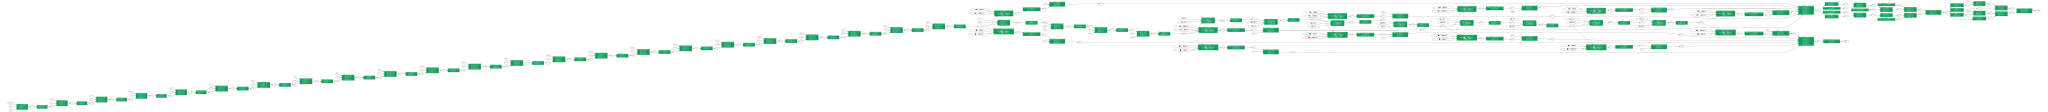

In [10]:
from IPython.display import SVG, display
def show_svg():
    display(SVG('squeezenet.svg'))
show_svg()

5. Deploy the ONNX model on ONNX runtime (ORT) server. You need to set up the environment
following steps listed in the tutorial. Then you need make HTTP request to the ORT server. Test the
inferencing set-up using 1 image from each of the two selected categories.

In [11]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 108.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 kB 63.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
!sudo docker pull mcr.microsoft.com/onnxruntime/server

Using default tag: latest
latest: Pulling from onnxruntime/server
Digest: sha256:a23da0977bbc4aca4d3de56ad648ebde86031e61d7a3b7cbe1daaebbc7f6ad3d
Status: Image is up to date for mcr.microsoft.com/onnxruntime/server:latest
mcr.microsoft.com/onnxruntime/server:latest


In [1]:
!git clone https://github.com/onnx/tutorials.git

Cloning into 'tutorials'...
remote: Enumerating objects: 719, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 719 (delta 47), reused 100 (delta 31), pack-reused 589
Receiving objects: 100% (719/719), 37.76 MiB | 26.85 MiB/s, done.
Resolving deltas: 100% (319/319), done.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  del sys.path[0]


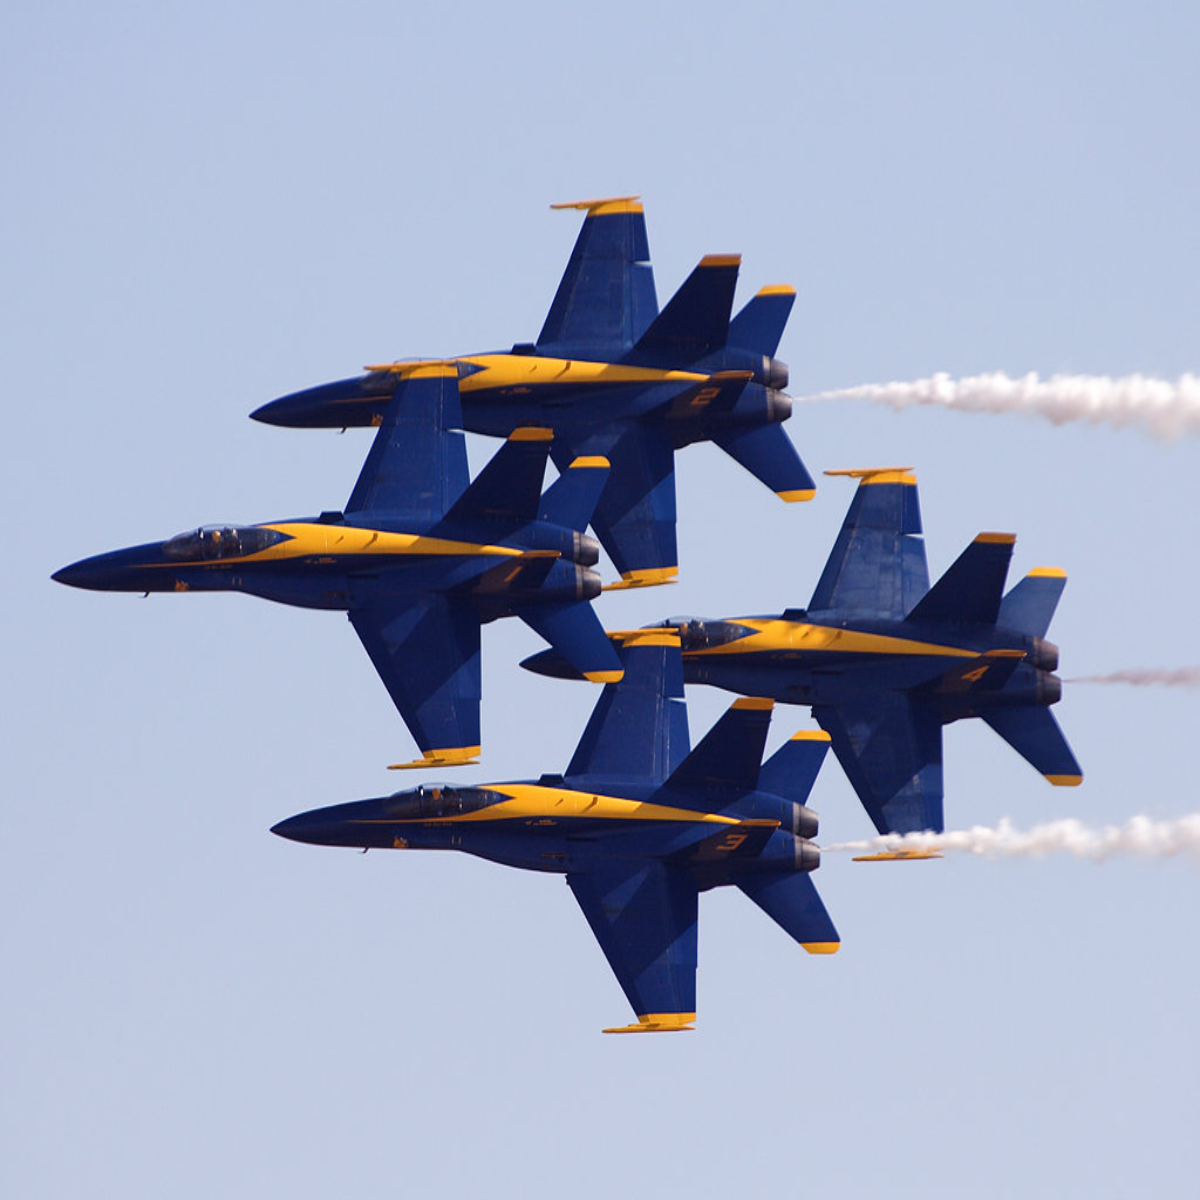

In [13]:
import numpy as np
import requests
import tutorials.tutorials.assets.onnx_ml_pb2 as onnx_ml_pb2
import tutorials.tutorials.assets.predict_pb2 as predict_pb2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the raw image

input_shape = (1, 3, 1200, 1200)
img = Image.open("Blueangels.jpg")
img = img.resize((1200, 1200), Image.BILINEAR)

# Let us see what the input image looks like
img

In [15]:
# Preprocess and normalize the image

img_data = np.array(img)
img_data = np.transpose(img_data, [2, 0, 1])
img_data = np.expand_dims(img_data, 0)
mean_vec = np.array([0.485, 0.456, 0.406])
stddev_vec = np.array([0.229, 0.224, 0.225])
norm_img_data = np.zeros(img_data.shape).astype('float32')
for i in range(img_data.shape[1]):
    norm_img_data[:,i,:,:] = (img_data[:,i,:,:]/255 - mean_vec[i]) / stddev_vec[i]

    
    

In [16]:
# Create request message to be sent to the ORT server

input_tensor = onnx_ml_pb2.TensorProto()
print(input_tensor.dims)
input_tensor.dims.extend(norm_img_data.shape)
print(norm_img_data.shape)
input_tensor.data_type = 1
input_tensor.raw_data = norm_img_data.tobytes()

request_message = predict_pb2.PredictRequest()
print(request_message)

# For your model, the inputs name should be something else customized by yourself. Use Netron to find out the input name.
request_message.inputs["input.1"].data_type = input_tensor.data_type
request_message.inputs["input.1"].dims.extend(input_tensor.dims)
request_message.inputs["input.1"].raw_data = input_tensor.raw_data
print(request_message.inputs["input.1"].dims)
content_type_headers = ['application/x-protobuf', 'application/octet-stream', 'application/vnd.google.protobuf']

for h in content_type_headers:
    request_headers = {
        'Content-Type': h,
        'Accept': 'application/x-protobuf'
    }

[]
(1, 3, 1200, 1200)

[1, 3, 1200, 1200]


In [19]:

# Inference run using ORT server
# Change the number 9001 to the appropriate port number if you had changed it during ORT Server docker instantiation

PORT_NUMBER = 9001 # Change appropriately if needed based on any changes when invoking the server in the pre-requisites
inference_url = "http://127.0.0.1:" + str(PORT_NUMBER) + "/v1/models/default/versions/1:predict"
response = requests.post(inference_url, headers=request_headers, data=request_message.SerializeToString())


# # Parse response message

# response_message = predict_pb2.PredictResponse()
# response_message.ParseFromString(response.content)

# # For your model, the outputs names should be something else customized by yourself. Use Netron to find out the outputs names.
# bboxes = np.frombuffer(response_message.outputs['bboxes'].raw_data, dtype=np.float32)
# labels = np.frombuffer(response_message.outputs['labels'].raw_data, dtype=np.int64)
# scores = np.frombuffer(response_message.outputs['scores'].raw_data, dtype=np.float32)

# print('Boxes shape:', response_message.outputs['bboxes'].dims)
# print('Labels shape:', response_message.outputs['labels'].dims)
# print('Scores shape:', response_message.outputs['scores'].dims)

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=9001): Max retries exceeded with url: /v1/models/default/versions/1:predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fa3200e1290>: Failed to establish a new connection: [Errno 111] Connection refused'))

6. Parse the response message from the ORT server and annotate the two images. Show inferencing output
(bounding boxes with labels) for the two images.

In [ ]:
## Display image with bounding boxes and appropriate class 

# Parse the list of class labels
classes = [line.rstrip('\n') for line in open('assets/coco_classes.txt')]

# Plot the bounding boxes on the image
plt.figure()
fig, ax = plt.subplots(1, figsize=(12,9))
ax.imshow(img)

resized_width = 1200  # we resized the original image, remember ? 
resized_height = 1200
num_boxes = 6 # we limit displaying to just 10 boxes to avoid clogging the result image with boxes
               # The results are already sorted based on box confidences, so we just pick top N boxes without sorting
    
for c in range(num_boxes):    
    base_index = c * 4
    y1, x1, y2, x2 = bboxes[base_index] * resized_height, bboxes[base_index + 1] * resized_width, bboxes[base_index + 2] * resized_height, bboxes[base_index + 3] * resized_width 
    color = 'blue'
    box_h = (y2 - y1)
    box_w = (x2 - x1)
    bbox = patches.Rectangle((y1, x1), box_h, box_w, linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(bbox)
    plt.text(y1, x1, s=classes[labels[c] - 1], color='white', verticalalignment='top', bbox={'color': color, 'pad': 0})
plt.axis('off')

# Save image
plt.savefig("output/ssd_result.jpg", bbox_inches='tight', pad_inches=0.0)
plt.show()


### Question 2

In this question you will analyze different ML cloud platforms and compare their service overings. In particular, you will consider ML cloud overings from IBM, Google, Microsoft, and Amazon and compare them on the basis of following criteria:

1. Frameworks: DL framework(s) supported and their version. (4)
Here we are referring to machine learning platforms which have their own inbuilt images for different frameworks.


GCP: PyTorch, Tensorflow(w Keras), Caffe 2, scikit-learn, CNTK, RAPIDS, Chainer,Kubeflow

AWS: PyTorch, TensorFlow(w Keras), Caffe 2, scikit-learn,Apache MXNet, Gluon, Horovod

Azure: PyTorch, TensorFlow(w Keras), scikit-learn, MXNet, Chainer.

IBM: PyTorch, Tensorflow(w Keras)


2. Compute units: type(s) of compute units offered, i.e., GPU types.

GCP: 

    GPUs: NVIDIA K80, P100, P4, T4, V100, and A100

    CPUs: Intel Sandy Bridge, Ivy Bridge, Haswell, Broadwell, and Skylake CPU platforms(N1 machine series) Intel Ice Lake and Cascade Lake CPU platforms(N2 machine series), AMD EPYC Milan processors(E2 machine series), AMD EPYC Rome and third generation AMD EPYC Milan platforms(N2D).


AWS:

    GPUs: NVIDIA M60, A10G, T4, V100, and A100
    
    CPUs: Intel Xeon E5-2686 v4 (Broadwell) processor;Intel Xeon Scalable processors (Cascade Lake P-8275CL); Intel Xeon Scalable Processors (Cascade Lake 8252C);Intel Xeon Scalable Processors (Cascade Lake 8259CL);AMD EPYC 7000 series processors (AMD EPYC 7571);Intel Xeon Scalable processor (Skylake 8175M or Cascade Lake 8259CL) ;AMD EPYC processors (AMD EPYC 7R13);Intel Xeon Scalable processors (Ice Lake 8375C);3.3 GHz Intel Xeon Scalable processor (Haswell E5-2676 v3 or Broadwell E5-2686 v4);AMD EPYC 7000 series processors (AMD EPYC 7571); Intel Xeon Scalable processor (Skylake 8175M or Cascade Lake 8259CL);Intel’s 8th generation 3.2 GHz (4.6 GHz turbo) Core i7 processors
    
Azure: 

    GPUs: NVIDIA M60, P100, T4, V100, and A100

    CPUs:  Intel® XEON ® E5-2673 v4 (Broadwell) processor, Intel® Xeon® Platinum 8272CL processor,Intel® Xeon® Platinum 8272CL processor，3rd Generation AMD EPYC™ 7763v (Milan) processor， Altra 64-bit Multi-Intel® Xeon® processor E5 v3 family,Core Arm-based processor，AMD EPYC™ 7452 processorIntel® Xeon® processor E5 v3 family
    
IBM: 

    GPUs: NVIDIA T4 V100 P100

    CPUs: Gx2-8x64x1v,AC1.8x60, AC2.8x60,AC2.8x60,Intel Xeon 4210/5218/6248

3. Model lifecycle management: tools supported to manage ML model lifecycle.


GCP: Kubeflow

AWS: Amazon Sagemaker

Azure: MLOps

IBM: IBM Cloud Pak

4. Monitoring: availability of application logs and resource (GPU, CPU, memory) usage monitoring data
to the user.

GCP: Cloud Monitoring.

AWS: CloudWatch.

Azure: Azure Monitor.

IBM: Monitoring from IBM Cloud Account.


5. Visualization during training: performance metrics like accuracy and throughput

GCP: Tensorboard.

AWS: Amazon SageMaker Python SDK APIs.

Azure: Azure Machine Learning Python SDK.

IBM: Deep Learning Experiemnt builder.

6. Elastic Scaling: support for elastic scaling compute resources of an ongoing job.

GCP: Autoscaling works with managed instance groups (MIGs) only. Unmanaged instance groups are not supported.

AWS: AWS Auto Scaling monitors your applications and automatically adjusts capacity to maintain steady, predictable performance at the lowest possible cost.

Azure: Autoscale is a built-in feature of Cloud Services, Mobile Services, Virtual Machine Scale Sets, and Websites that helps applications perform their best when demand changes. Of course, performance means different things for different applications. Some apps are CPU-bound, others memory-bound.

IBM: If you are using IBM Cloud console, you need to create an instance template, an instance group, and if you choose the dynamic scaling method, you must create scaling policies. You set scaling policies that define your desired average utilization for metrics like CPU, memory, and network usage. The policies that you define determine when virtual server instances are added or removed from your instance group.

7. Training job description: training job description file format. Show how the same training job is specified in different ML platforms. Identify similar fields in the training job file for the 4 ML platforms through an example.


GCP: Example 1 with gcloud(https://cloud.google.com/ai-platform/training/docs/training-jobs#gcloud_1: 

gcloud ai-platform jobs submit training $JOB_NAME \
        --scale-tier basic \
        --package-path $PACKAGE_PATH \
        --module-name $MODULE_NAME \
        --job-dir $JOB_DIR \
        --region $REGION \
        -- \
        --user_first_arg=first_arg_value \
        --user_second_arg=second_arg_value.

AWS: CreateTrainingJob in SageMaker (https://docs.aws.amazon.com/sagemaker/latest/APIReference/API_CreateTrainingJob.html):

{
   "AlgorithmSpecification": { 
      "AlgorithmName": "string",
      "ContainerArguments": [ "string" ],
      "ContainerEntrypoint": [ "string" ],
      "EnableSageMakerMetricsTimeSeries": boolean,
      "MetricDefinitions": [ 
         { 
            "Name": "string",
            "Regex": "string"
         }
      ],
      "TrainingImage": "string",
      "TrainingInputMode": "string"
   },
   "CheckpointConfig": { 
      "LocalPath": "string",
      "S3Uri": "string"
   },
   "DebugHookConfig": { 
      "CollectionConfigurations": [ 
         { 
            "CollectionName": "string",
            "CollectionParameters": { 
               "string" : "string" 
            }
         }
      ],
      "HookParameters": { 
         "string" : "string" 
      },
      "LocalPath": "string",
      "S3OutputPath": "string"
   },
   "DebugRuleConfigurations": [ 
      { 
         "InstanceType": "string",
         "LocalPath": "string",
         "RuleConfigurationName": "string",
         "RuleEvaluatorImage": "string",
         "RuleParameters": { 
            "string" : "string" 
         },
         "S3OutputPath": "string",
         "VolumeSizeInGB": number
      }
   ],
   "EnableInterContainerTrafficEncryption": boolean,
   "EnableManagedSpotTraining": boolean,
   "EnableNetworkIsolation": boolean,
   "Environment": { 
      "string" : "string" 
   },
   "ExperimentConfig": { 
      "ExperimentName": "string",
      "RunName": "string",
      "TrialComponentDisplayName": "string",
      "TrialName": "string"
   },
   "HyperParameters": { 
      "string" : "string" 
   },
   "InputDataConfig": [ 
      { 
         "ChannelName": "string",
         "CompressionType": "string",
         "ContentType": "string",
         "DataSource": { 
            "FileSystemDataSource": { 
               "DirectoryPath": "string",
               "FileSystemAccessMode": "string",
               "FileSystemId": "string",
               "FileSystemType": "string"
            },
            "S3DataSource": { 
               "AttributeNames": [ "string" ],
               "InstanceGroupNames": [ "string" ],
               "S3DataDistributionType": "string",
               "S3DataType": "string",
               "S3Uri": "string"
            }
         },
         "InputMode": "string",
         "RecordWrapperType": "string",
         "ShuffleConfig": { 
            "Seed": number
         }
      }
   ],
   "OutputDataConfig": { 
      "KmsKeyId": "string",
      "S3OutputPath": "string"
   },
   "ProfilerConfig": { 
      "DisableProfiler": boolean,
      "ProfilingIntervalInMilliseconds": number,
      "ProfilingParameters": { 
         "string" : "string" 
      },
      "S3OutputPath": "string"
   },
   "ProfilerRuleConfigurations": [ 
      { 
         "InstanceType": "string",
         "LocalPath": "string",
         "RuleConfigurationName": "string",
         "RuleEvaluatorImage": "string",
         "RuleParameters": { 
            "string" : "string" 
         },
         "S3OutputPath": "string",
         "VolumeSizeInGB": number
      }
   ],
   "ResourceConfig": { 
      "InstanceCount": number,
      "InstanceGroups": [ 
         { 
            "InstanceCount": number,
            "InstanceGroupName": "string",
            "InstanceType": "string"
         }
      ],
      "InstanceType": "string",
      "KeepAlivePeriodInSeconds": number,
      "VolumeKmsKeyId": "string",
      "VolumeSizeInGB": number
   },
   "RetryStrategy": { 
      "MaximumRetryAttempts": number
   },
   "RoleArn": "string",
   "StoppingCondition": { 
      "MaxRuntimeInSeconds": number,
      "MaxWaitTimeInSeconds": number
   },
   "Tags": [ 
      { 
         "Key": "string",
         "Value": "string"
      }
   ],
   "TensorBoardOutputConfig": { 
      "LocalPath": "string",
      "S3OutputPath": "string"
   },
   "TrainingJobName": "string",
   "VpcConfig": { 
      "SecurityGroupIds": [ "string" ],
      "Subnets": [ "string" ]
   }
}

Azure: Azure ML Core Experiment:

    from azureml.core import Experiment 

    # create an experiment variable 
    experiment = Experiment(workspace = ws, name = "my-experiment") 

    # start the experiment 
    run = experiment.start_logging() 

    # experiment code goes here 

    # end the experiment 
    run.complete()
    
    from azureml.pipeline.steps import PythonScriptStep 
    # Step to run a Python script 
    step1 = PythonScriptStep(name = 'prepare data step', 
                             source_directory = 'script_dir', 
                             script_name = 'data_prep.py', 
                             compute_target = 'aml-compute-cluster') 

    # Step to train a model 
    step2 = PythonScriptStep(name = 'train model step',
                             source_directory = 'script_dir', 
                             script_name = 'train_model.py', 
                             compute_target = 'aml-compute-cluster')


    from azureml.pipeline.core import Pipeline 
    from azureml.core import Experiment 

    # Construct the pipeline 
    train_pipeline = Pipeline(workspace = ws, steps = [step1,step2]) 

    # Create an experiment and run the pipeline 
    experiment = Experiment(workspace = ws, name = 'training-pipeline') 
    pipeline_run = experiment.submit(train_pipeline)
    
    
    from azureml.core import Experiment, ScriptRunConfig, Environment 
from azureml.core.conda_dependencies import CondaDependencies 

    # Create a Python environment for the experiment 
    mlflow_env = Environment("mlflow-env") 

    # Ensure the required packages are installed 
    packages = CondaDependencies.create(conda_packages=['pandas','pip'], pip_packages=['mlflow','azureml-mlflow']) 
    mlflow_env.python.conda_dependencies = packages 

    # Create a script config 
    script_config = ScriptRunConfig(source_directory='my_dir', script='script.py', environment=mlflow_env) 

    # submit the experiment 
    experiment = Experiment(workspace=ws, name='mlflow-script') 
    run = experiment.submit(config=script_config)

Source:https://www.data4v.com/experiments-in-azure-machine-learning/

IBM: Hwo to submit an experiment: 
    bx ml generate-manifest experiments
    bx ml store experiments experiments.yaml
    bx ml list experiments
    bx ml experiments run <experiment-ID>
    
    Source: https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml_dlaas_working_with_experiments.html?context=analytics.

### Question 3


1. Setting up the environment and installing MiniKF: Follow the steps in the codelab to:

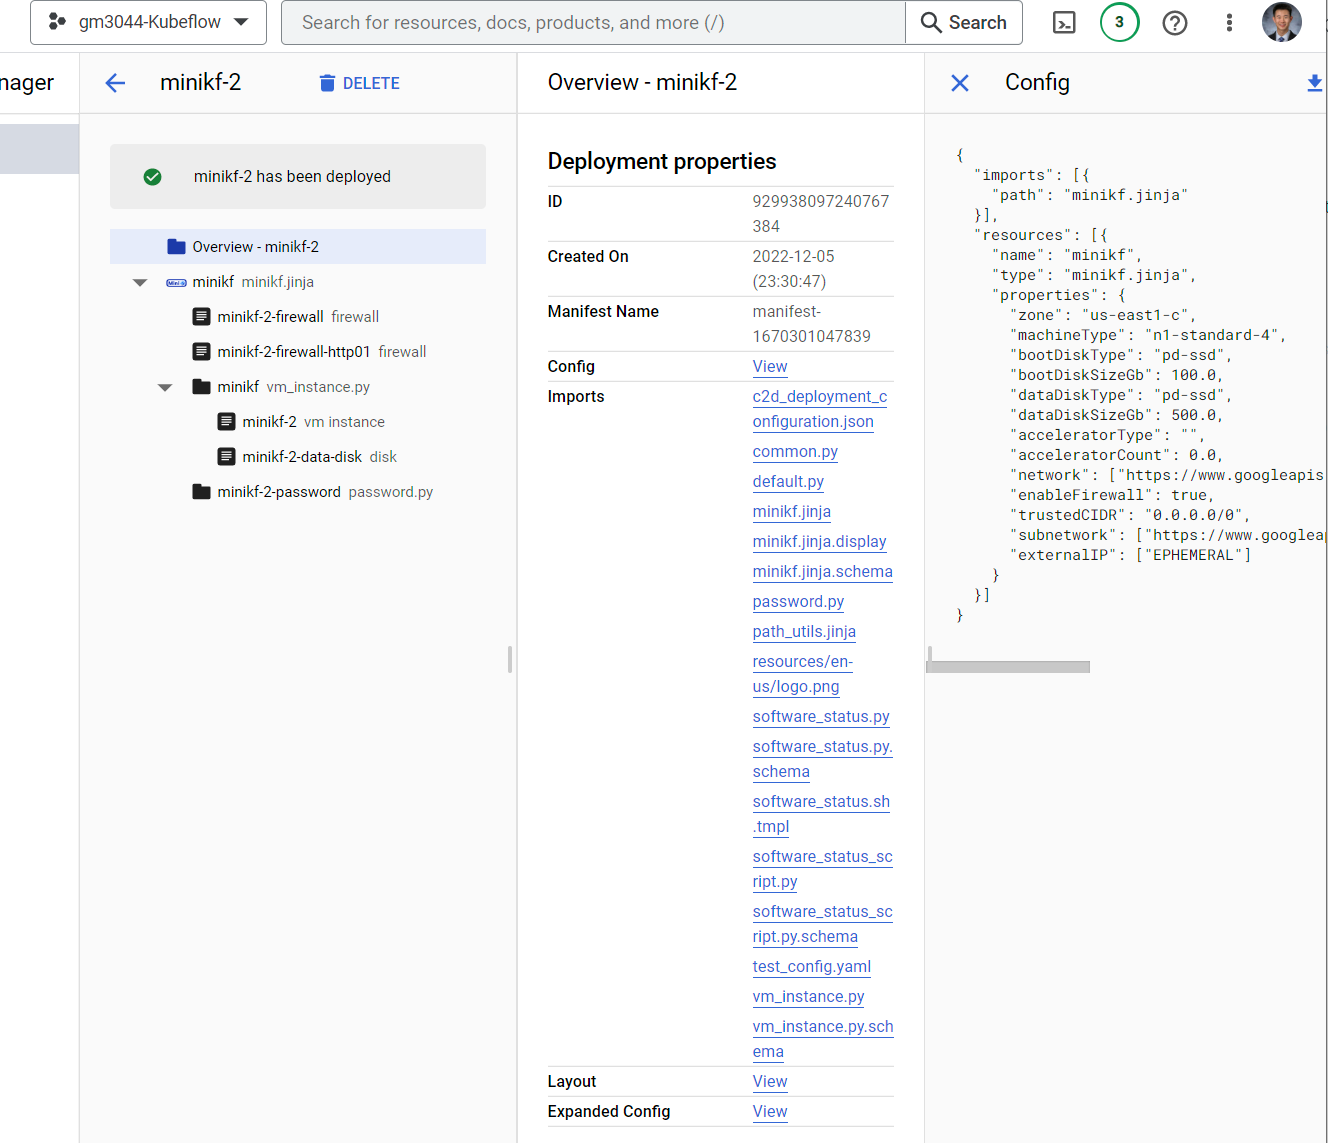

In [4]:
from IPython import display
display.Image("003.png")

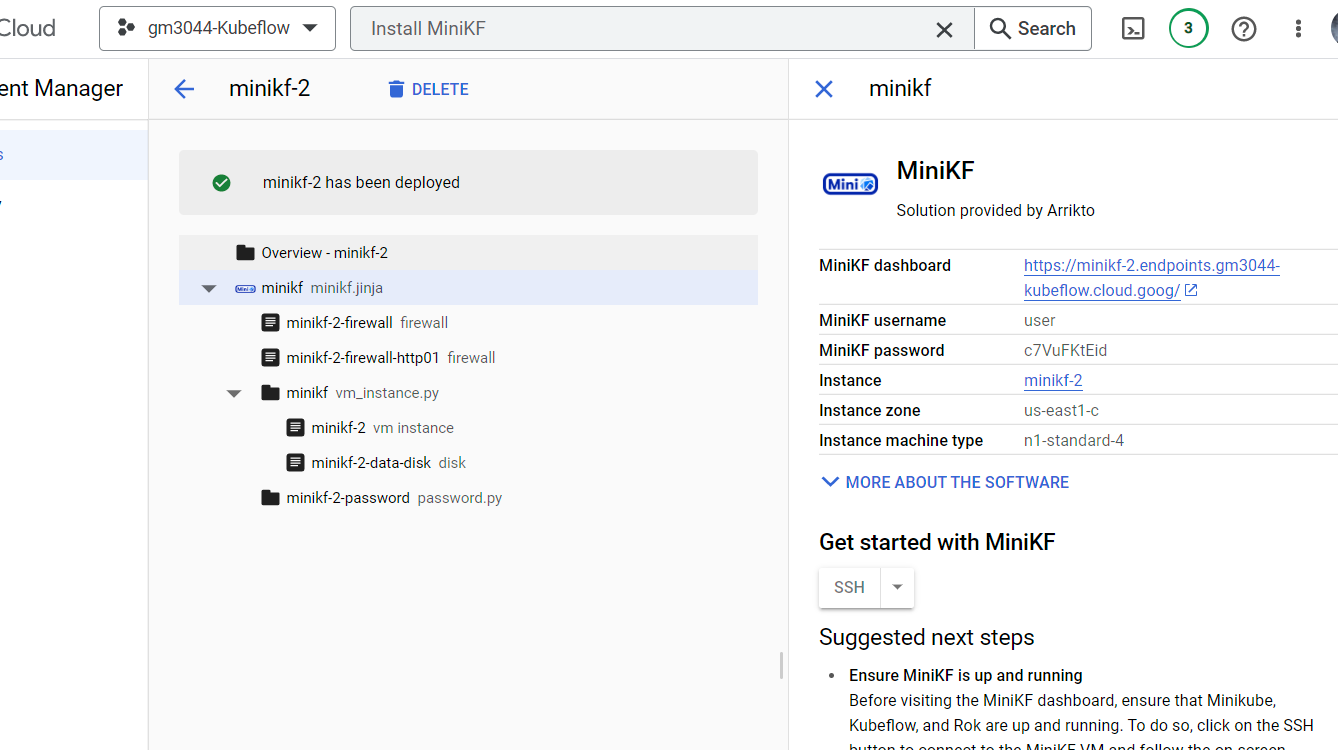

In [2]:
display.Image("004.png")

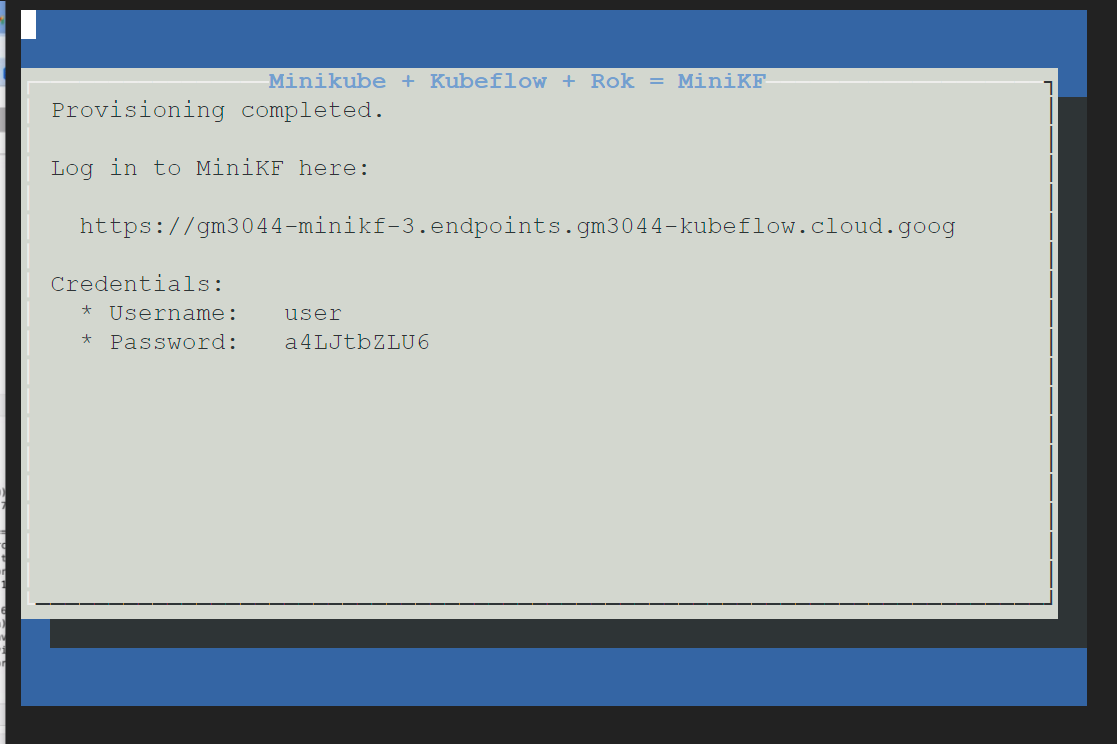

In [5]:
display.Image("005.png")

2. Run a Pipeline from inside your Notebook: Follow the steps in the codelab to:

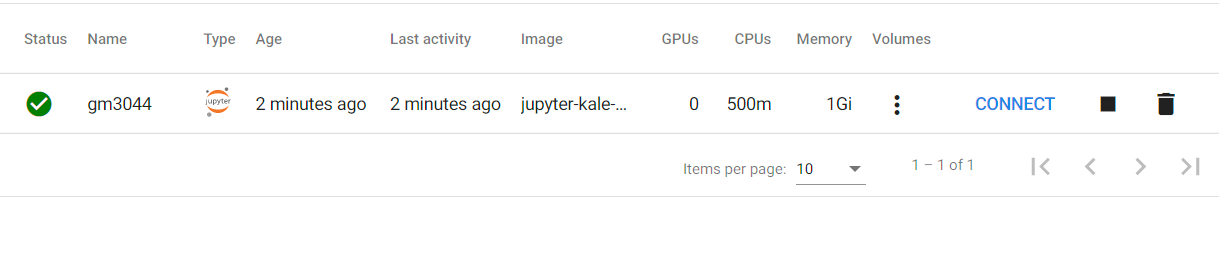

In [6]:
display.Image("006.png")

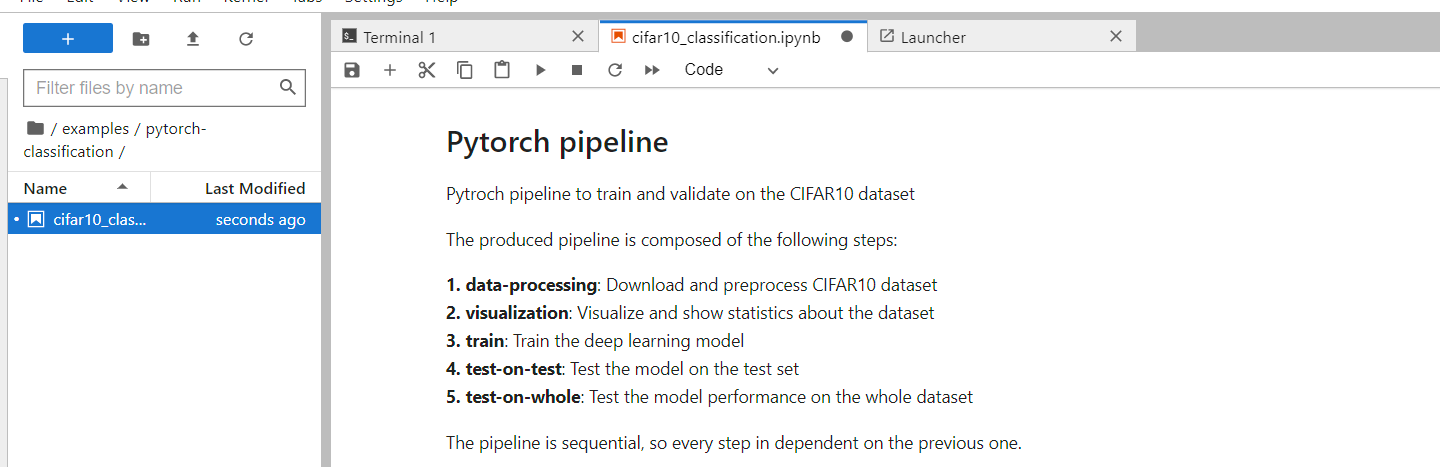

In [7]:
display.Image("007.png")

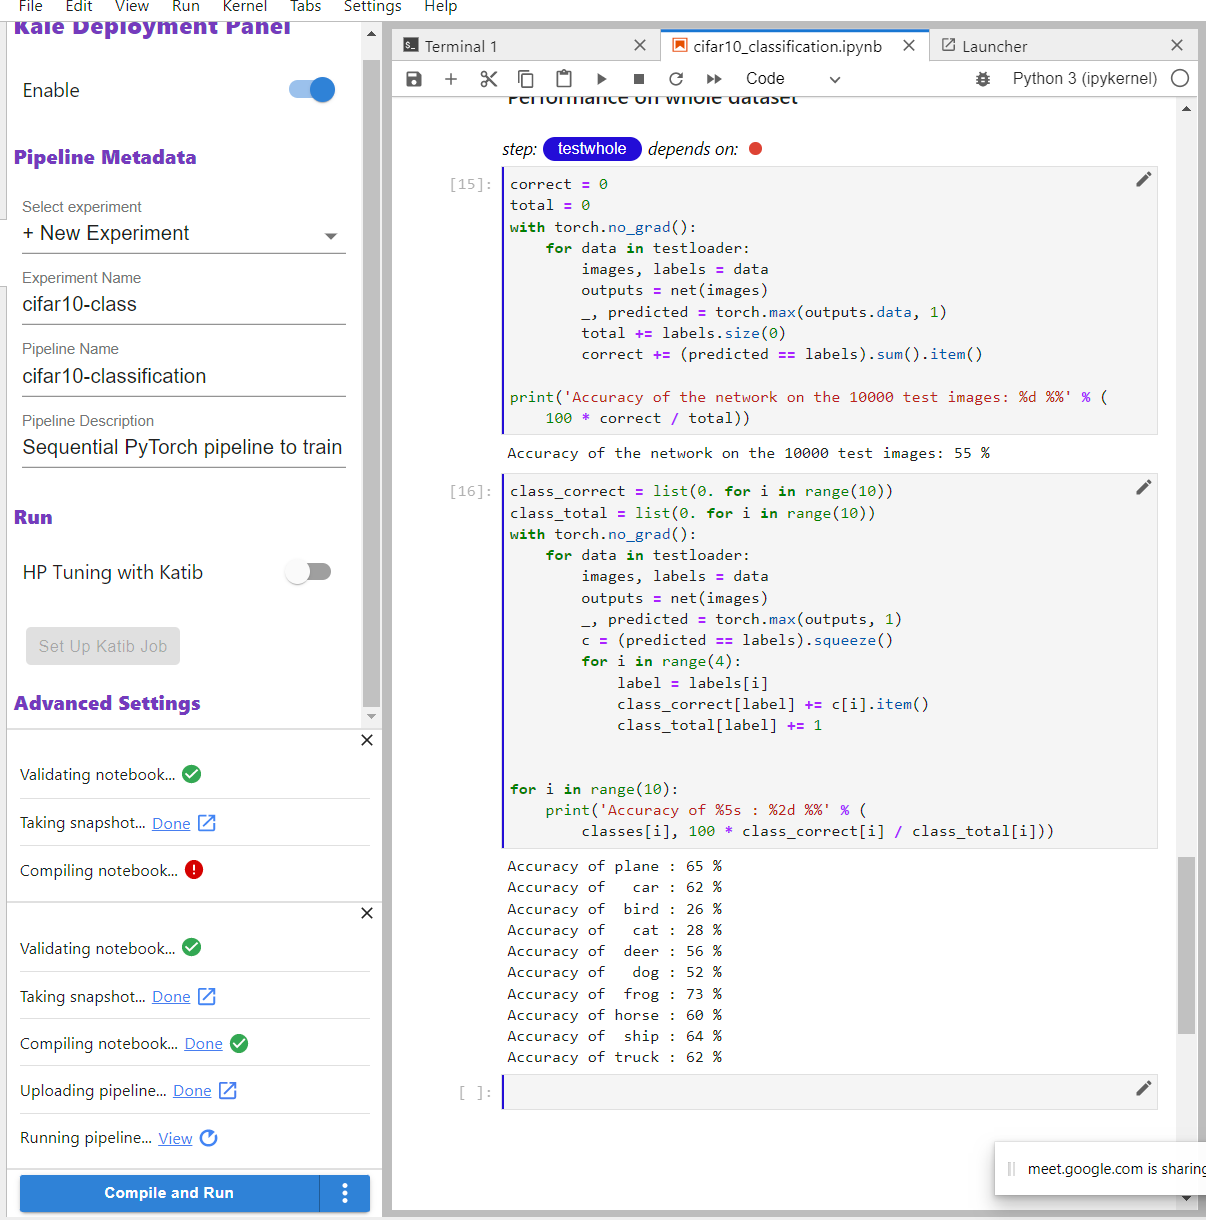

In [8]:
display.Image("008.png")

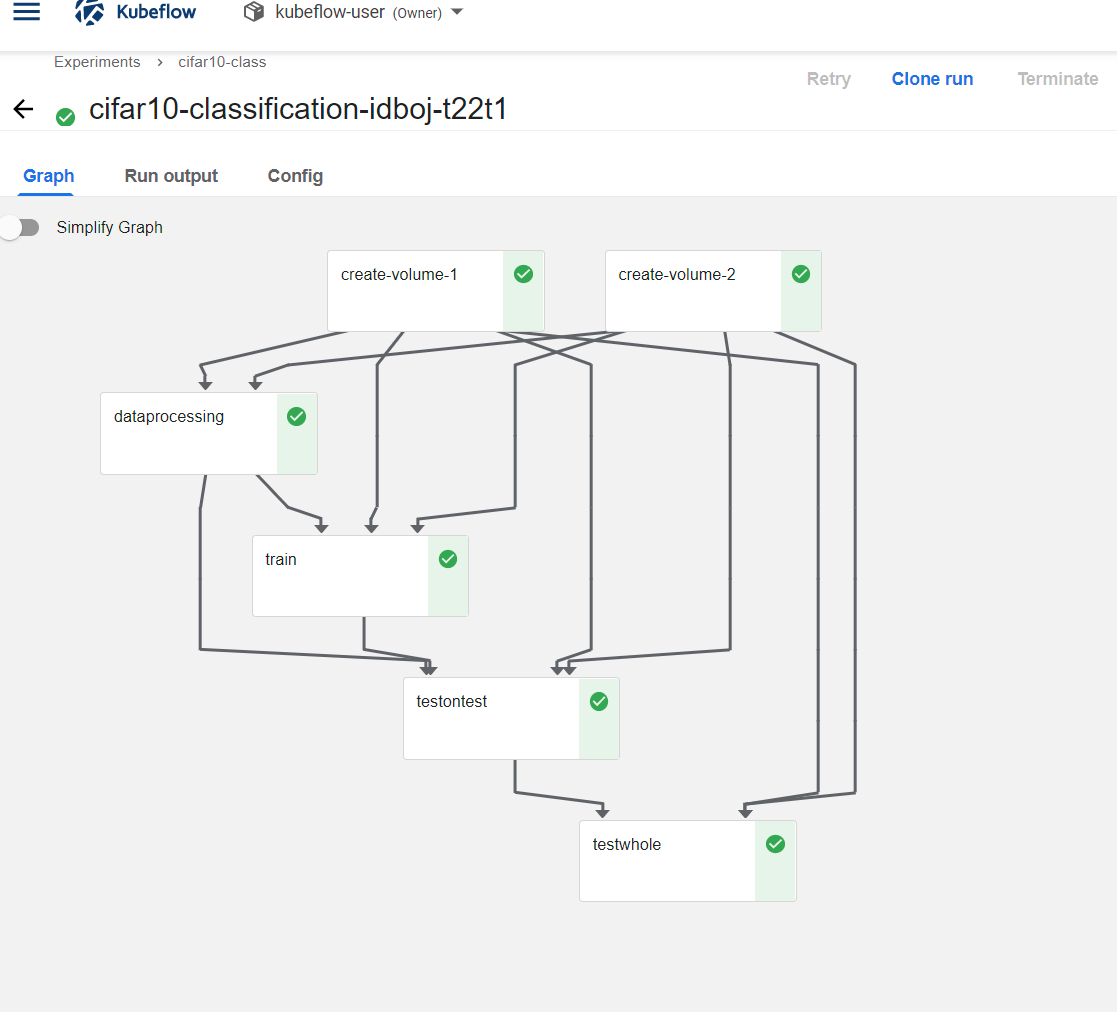

In [9]:
display.Image("009.png")

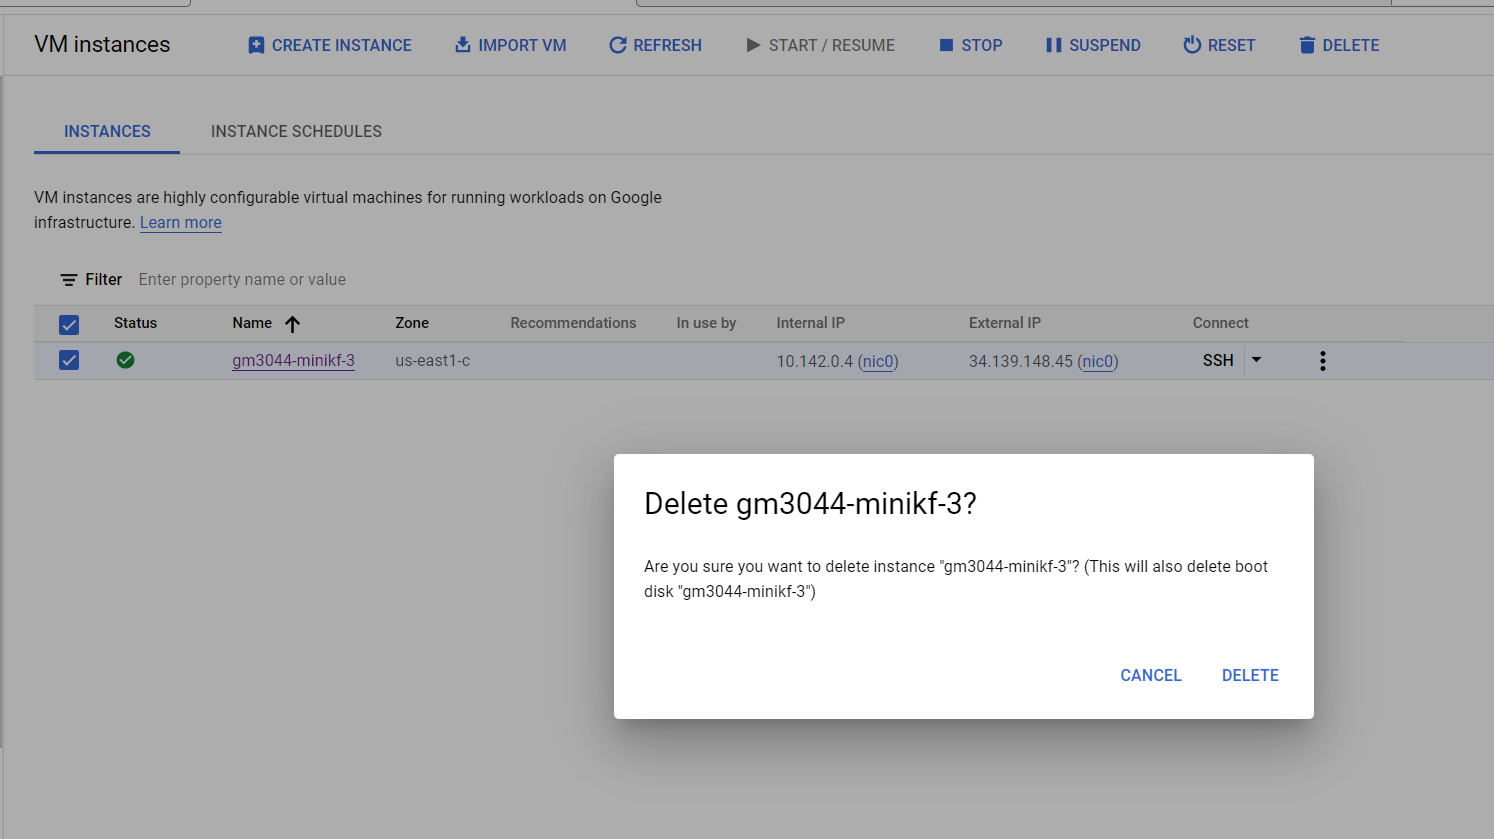

In [11]:
display.Image("100.png")

### Question 4


This question is based on Deep RL concepts discussed in Lecture 8. You need to refer to the papers by Mnih
et al., Nair et al., and Horgan et al. to answer this question. All papers are linked below.

1. Explain the difference between episodic and continuous tasks? Given an example of each.

A continuous task can go on forever, an episodic task has at least one finite state (i.e. an end of the game). Mathematically speaking an episodic task has a state with transition probability 1 to itself and 0 anywhere else. 

Maze (e.g., with reward 1 for escaping, else reward 0) is an episodic, there is a final state but theoretically it can still go on forever (running in circles). Tuning a heating systema is a continuous task as it doesn't have an end state.

2.What do the terms exploration and exploitation mean in RL ? Why do the actors employ ϵ-greedy policy for selecting actions at each step? Should ϵ remain fixed or follow a schedule during Deep RL training ? How does the value of ϵ help balance exploration and exploitation during training.

1. In Reinforcement Learning, this type of decision is called exploitation when you keep doing what you were doing, and exploration when you try something new. 

2. Employing $\epsilon$-greedy policy allows the agent to explore new actions instead of repeating the same one.

3. The value of $\epsilon$ governs the extent of explorative vs exploitative approaches. For example, a low epsilon value corresponds to a more exploitative approach and a higher epsilon value makes the agent more explorative. 
4. $\epsilon$ could follow a decaying scheme for episodic tasks so that the agent can explore more in the beginning and then settle down to a fixed exploration rate. But for continuous tasks, a schedule might not be desirable since it might eventually lead to the agent being completely exploitative.

3.How is the Deep Q-Learning algorithm different from Q-learning ? You will follow the steps of Deep Q-Learning algorithm in Mnih et al. (2013) page 5, and explain each step in your own words.

1.First, each step of experience is potentially used in many weight updates, which allows for greater data efficiency.

2.Second, learning directly from consecutive samples is inefficient, due to the strong correlations between the samples; randomizing the samples breaks these correlations and therefore reduces the variance of the updates. 

3.Third, when learning on-policy the current parameters determine the next
data sample that the parameters are trained on.

Lastly, when learning by experience replay, it is necessary to learn off-policy to motivate the choice of Q-learning.

4.What is the benefit of having a target Q-network ?

Using the target network's Q values to train the main Q-network will improve the stability of the training. Later, when we present the code of the training loop, we will enter in more detail how to code the initialization and use of this target network.

5.How does experience replay help in efficient Q-learning ? 

1. More efficient use of previous experience, by learning with it multiple times.Q-learning updates are incremental and do not converge quickly, so multiple passes with the same data is beneficial, especially when there is low variance in immediate outcomes (reward, next state) given the same state, action pair. 
2. Better convergence behaviour when training a function approximator. Partly this is because the data is more like i.i.d. data assumed in most supervised learning convergence proofs.


6. What is prioritized experience replay ? 

1.Prioritized Experience Replay is a type of experience replay in reinforcement learning where we In more frequently replay transitions with high expected learning progress, as measured by the magnitude of their temporal-difference (TD) error.

7.Compare and contrast GORILA (General Reinforcement Learning Architecture) and Ape-X architecture.
Provide three similarities and three differences.

The architectures GORILA and Ape-X have some similarities as shown below: 
1. Both architectures are deep reinforcement learning architectures which have multiple actors.
2. In both architectures, each actor has its own instance of the environment.
3. Both architectures, observed data is stored in replay memory.

On the other hand, GORILA architecture has a local replay memory for each actor along with having a global consolidated replay memory. Each experience/data is sample uniformly.Ape-X architecture only has a shared centralized experience replay memory. Experiences/data are prioritized to use most useful data more often.

Reference:https://medium.com/nerd-for-tech/reinforcement-learning-and-deep-learning-6ff6f0393fb8
